<a href="https://colab.research.google.com/github/GoldenWanGila/Collage-Project/blob/master/%E9%A0%86%E6%99%AE%E5%A4%AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[06:43:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.37874510376695136


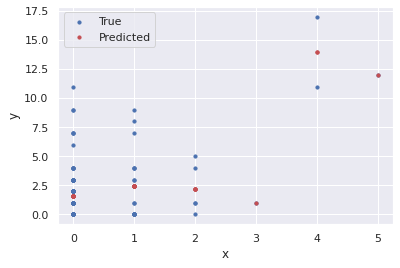

2.2648374971310608
[06:43:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.27532277454160814


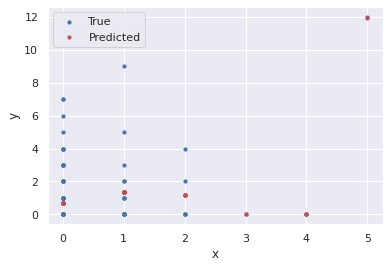

1.628889771268865
[06:43:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.3836961284448853


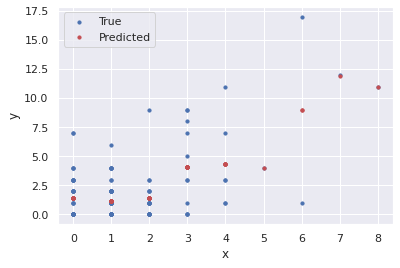

2.2557947542830004
[06:43:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.4084341442831615


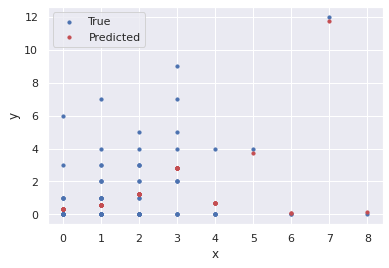

1.471705589413491


In [6]:
import matplotlib.pyplot as plt
from numpy.core import numeric
import seaborn as sns; sns.set()
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import sklearn.linear_model
import os
import os
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sympy import *
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt

rail = pd.read_csv("/content/drive/MyDrive/railway_original.csv")
rail = rail.dropna()
rail=rail.drop([22157])

rail = rail[rail["type"]==1]
rail = rail[rail["date"]>='2021/01/29']
rail = rail[rail["date"]!="2021/04/02"]
rail = rail[rail["date"]!="2021/04/03"]
rail = rail[rail["date"]!="2020/12/23"]


label_map = {'Keelung':1,'Xizhi':2,'Taipei':3,'Banqiao':4,'Taoyuan':5,'Zhongli':6,'Hsinchu':7,'Zhunan':8,'Miaoli':9,'Fengyuan':10,'Taichung':11,'Changhua':12,'Yuanlin':13,
'Douliu':14,'Chiayi':15,'Tainan':16,'Xinzuoying':17,'Kaohsiung':18,'Tanzi':0,'Taiyuan':0,'Xinwuri':0}

#普太資格(高雄、台南、台中、新竹、桃園、板橋、台北)
#實驗站、賺錢站、爭議站(嘉義、豐原、苗栗、中壢、桃園)
list1 = [110,136]
railh = rail[rail["num"].isin(list1)]
#110(高雄、台南、台中、新竹、板橋、台北)(對照組)
#136(高雄、台南、嘉義、台中、桃園、板橋、台北)

railkh = railh[railh["Station"]=='Kaohsiung']
railtn = railh[railh["Station"]=='Tainan']
railcy = railh[railh["Station"]=='Chiayi']
railtc = railh[railh["Station"]=='Taichung']
railhc = railh[railh["Station"]=='Hsinchu']
railty = railh[railh["Station"]=='Taoyuan']
railbq = railh[railh["Station"]=='Banqiao']
railtp = railh[railh["Station"]=='Taipei']

#136(高雄、台南、嘉義、台中、桃園、板橋、台北)

list2 = [280,282,288]
rail = rail[rail["num"].isin(list2)]
#服務海線性質可不做實驗
#278(員林、彰化>海線>竹南、新竹、中壢、桃園、板橋、台北)
rail1 = rail[rail["Station"]=='Yuanlin']
rail2 = rail[rail["Station"]=='Changhua']
rail3 = rail[rail["Station"]=='Taichung']
rail4 = rail[rail["Station"]=='Fengyuan']
rail5 = rail[rail["Station"]=='Hsinchu']
rail6 = rail[rail["Station"]=='Zhongli']
rail7 = rail[rail["Station"]=='Taoyuan']
rail8 = rail[rail["Station"]=='Banqiao']
rail9 = rail[rail["Station"]=='Taipei']

#280(斗六、員林、彰化、台中、豐原、苗栗、板橋、台北)
railj = rail[rail["num"]==280]

rail10 = railj[railj["Station"]=='Douliu']
rail11 = railj[railj["Station"]=='Yuanlin']
rail12 = railj[railj["Station"]=='Changhua']
rail13 = railj[railj["Station"]=='Taichung']
rail14 = railj[railj["Station"]=='Fengyuan']
rail15 = railj[railj["Station"]=='Miaoli']
rail16 = railj[railj["Station"]=='Banqiao']
rail17 = railj[railj["Station"]=='Taipei']

#282(彰化、台中、豐原、板橋、台北)
railk = rail[rail["num"]==282]

rail20 = railk[railk["Station"]=='Changhua']
rail21 = railk[railk["Station"]=='Taichung']
rail22 = railk[railk["Station"]=='Fengyuan']
rail23 = railk[railk["Station"]=='Banqiao']
rail24 = railk[railk["Station"]=='Taipei']

#288(彰化、台中、豐原、苗栗、新竹、中壢、桃園、板橋、台北)
raill = rail[rail["num"]==288]

rail30 = raill[raill["Station"]=='Changhua']
rail31 = raill[raill["Station"]=='Taichung']
rail32 = raill[raill["Station"]=='Fengyuan']
rail33 = raill[raill["Station"]=='Miaoli']
rail34 = raill[raill["Station"]=='Hsinchu']
rail35 = raill[raill["Station"]=='Zhongli']
rail36 = raill[raill["Station"]=='Taoyuan']
rail37 = raill[raill["Station"]=='Banqiao']
rail38 = raill[raill["Station"]=='Taipei']

#普太資格(高雄、台南、台中、新竹、桃園、板橋、台北)
#實驗站、賺錢站、爭議站(嘉義、豐原、苗栗、新竹、中壢、桃園)
#台中>>新竹、台中>>桃園
#做:110.136      高雄>>台北、高雄>>台中、台南>>台北、台南>>台中
new_ticks = np.linspace(0,99,100)

xkp= railkh["delay"].to_numpy()
ykp= railtp["delay"].to_numpy()
xkp=xkp.reshape(-1,1)
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xkp,ykp)
predicted=xgbrModel.predict(xkp)
print("xg Score: ",xgbrModel.score(xkp,ykp))
plt.scatter(xkp, ykp, s=10, label='True')
plt.scatter(xkp, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(ykp,predicted)
print(sqrt(v))


xkc= railkh["delay"].to_numpy()
ykc= railtc["delay"].to_numpy()
xkc=xkc.reshape(-1,1)
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xkc,ykc)
predicted=xgbrModel.predict(xkc)
print("xg Score: ",xgbrModel.score(xkc,ykc))
plt.scatter(xkc, ykc, s=10, label='True')
plt.scatter(xkc, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(ykc,predicted)
print(sqrt(v))

xnb= railtn["delay"].to_numpy()
ynb= railtp["delay"].to_numpy()
xnb=xnb.reshape(-1,1)
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xnb,ynb)
predicted=xgbrModel.predict(xnb)
print("xg Score: ",xgbrModel.score(xnb,ynb))
plt.scatter(xnb, ynb, s=10, label='True')
plt.scatter(xnb, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(ynb,predicted)
print(sqrt(v))

xnb1= railtn["delay"].to_numpy()
ynb1= railtc["delay"].to_numpy()
xnb1=xnb1.reshape(-1,1)
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xnb1,ynb1)
predicted=xgbrModel.predict(xnb1)
print("xg Score: ",xgbrModel.score(xnb1,ynb1))
plt.scatter(xnb1, ynb1, s=10, label='True')
plt.scatter(xnb1, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(ynb1,predicted)
print(sqrt(v))


[06:43:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.06618251101542694


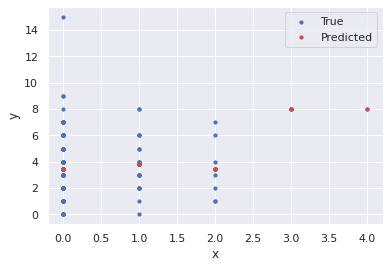

2.126987228183488
[06:43:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.04380677593204086


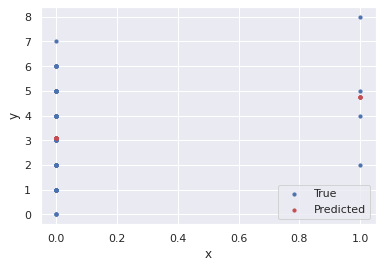

1.8429610559173493
[06:43:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.12891826376201243


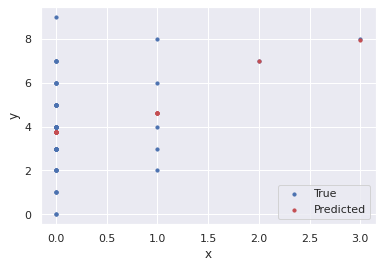

1.748938169104831
[06:43:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.09133006491713458


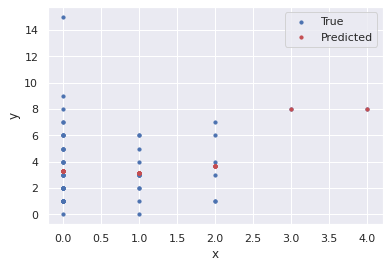

2.5557683221568324


In [7]:
#做:280.282.288  台中<>板橋(分開+全部)

x38= rail3["delay"].to_numpy()
y38= rail8["delay"].to_numpy()
x38=x38.reshape(-1,1)
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x38,y38)
predicted=xgbrModel.predict(x38)
print("xg Score: ",xgbrModel.score(x38,y38))
plt.scatter(x38, y38, s=10, label='True')
plt.scatter(x38, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y38,predicted)
print(sqrt(v))

x381= rail13["delay"].to_numpy()
y381= rail16["delay"].to_numpy()
x381=x381.reshape(-1,1)
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x381,y381)
predicted=xgbrModel.predict(x381)
print("xg Score: ",xgbrModel.score(x381,y381))
plt.scatter(x381, y381, s=10, label='True')
plt.scatter(x381, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y381,predicted)
print(sqrt(v))

x382= rail21["delay"].to_numpy()
y382= rail23["delay"].to_numpy()
x382=x382.reshape(-1,1)
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x382,y382)
predicted=xgbrModel.predict(x382)
print("xg Score: ",xgbrModel.score(x382,y382))
plt.scatter(x382, y382, s=10, label='True')
plt.scatter(x382, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y382,predicted)
print(sqrt(v))

x383= rail31["delay"].to_numpy()
y383= rail37["delay"].to_numpy()
x383=x383.reshape(-1,1)
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x383,y383)
predicted=xgbrModel.predict(x383)
print("xg Score: ",xgbrModel.score(x383,y383))
plt.scatter(x383, y383, s=10, label='True')
plt.scatter(x383, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y383,predicted)
print(sqrt(v))
